# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
### Goal is to gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? 

* Note: There is no 100% right answer

----

### Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis

In [3]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.shape

(227, 20)

In [6]:
df.describe()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.270000e+02    2.270000e+02                  227.000000   
mean   2.874028e+07    5.982270e+05                  379.047137   
std    1.178913e+08    1.790282e+06                 1660.185825   
min    7.026000e+03    2.000000e+00                    0.000000   
25%    4.376240e+05    4.647500e+03                   29.150000   
50%    4.786994e+06    8.660000e+04                   78.800000   
75%    1.749777e+07    4.418110e+05                  190.150000   
max    1.313974e+09    1.707520e+07                16271.500000   

       Coastline (coast/area ratio)  Net migration  \
count                    227.000000     224.000000   
mean                      21.165330       0.038125   
std                       72.286863       4.889269   
min                        0.000000     -20.990000   
25%                        0.100000      -0.927500   
50%                        0.730000       0.000000   
75%                       10.345000       0.997500   
max                      870.660000      23.060000   

       Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
count                          224.000000          226.000000    209.000000   
mean                            35.506964         9689.823009     82.838278   
std                             35.389899        10049.138513     19.722173   
min                              2.290000          500.000000     17.600000   
25%                              8.150000         1900.000000     70.600000   
50%                             21.000000         5550.000000     92.500000   
75%                             55.705000        15700.000000     98.000000   
max                            191.190000        55100.000000    100.000000   

       Phones (per 1000)  Arable (%)   Crops (%)   Other (%)     Climate  \
count         223.000000  225.000000  225.000000  225.000000  205.000000   
mean          236.061435   13.797111    4.564222   81.638311    2.139024   
std           227.991829   13.040402    8.361470   16.140835    0.699397   
min             0.200000    0.000000    0.000000   33.330000    1.000000   
25%            37.800000    3.220000    0.190000   71.650000    2.000000   
50%           176.200000   10.420000    1.030000   85.700000    2.000000   
75%           389.650000   20.000000    4.440000   95.440000    3.000000   
max          1035.600000   62.110000   50.680000  100.000000    4.000000   

        Birthrate   Deathrate  Agriculture    Industry     Service  
count  224.000000  223.000000   212.000000  211.000000  212.000000  
mean    22.114732    9.241345     0.150844    0.282711    0.565283  
std     11.176716    4.990026     0.146798    0.138272    0.165841  
min      7.290000    2.290000     0.000000    0.020000    0.062000  
25%     12.672500    5.910000     0.037750    0.193000    0.429250  
50%     18.790000    7.840000     0.099000    0.272000    0.571000  
75%     29.820000   10.605000     0.221000    0.341000    0.678500  
max     50.730000   29.740000     0.769000    0.906000    0.954000

# Exploratory Data Analysis

Let's create some visualizations.

<Figure size 720x432 with 0 Axes>

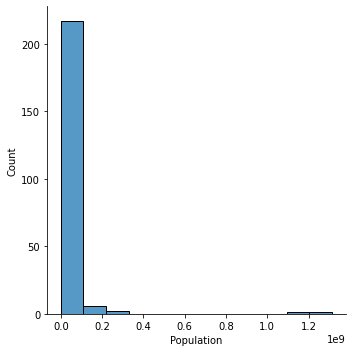

In [7]:
plt.figure(figsize=(10,6))
sns.displot(df.Population, bins=12);

**The histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.2 billion people**

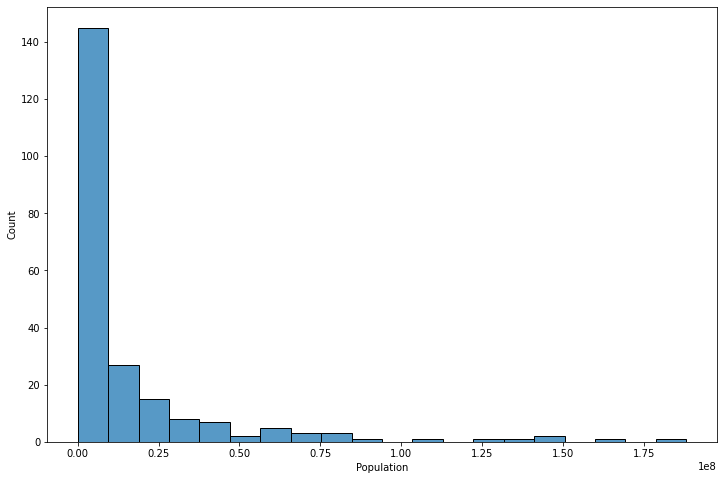

In [8]:
#Filter only population where countries is less than 2 hundred millions let say
plt.figure(figsize=(12, 8))
sns.histplot(data=df[df['Population']<200000000], x='Population', bins=20);

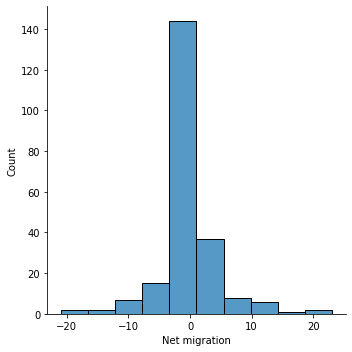

In [9]:
sns.displot(data = df, x='Net migration', bins=10);

**Explore GDP and Regions. Bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

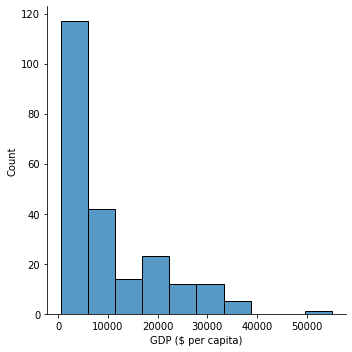

In [10]:
sns.displot(data=df, x='GDP ($ per capita)', bins=10);

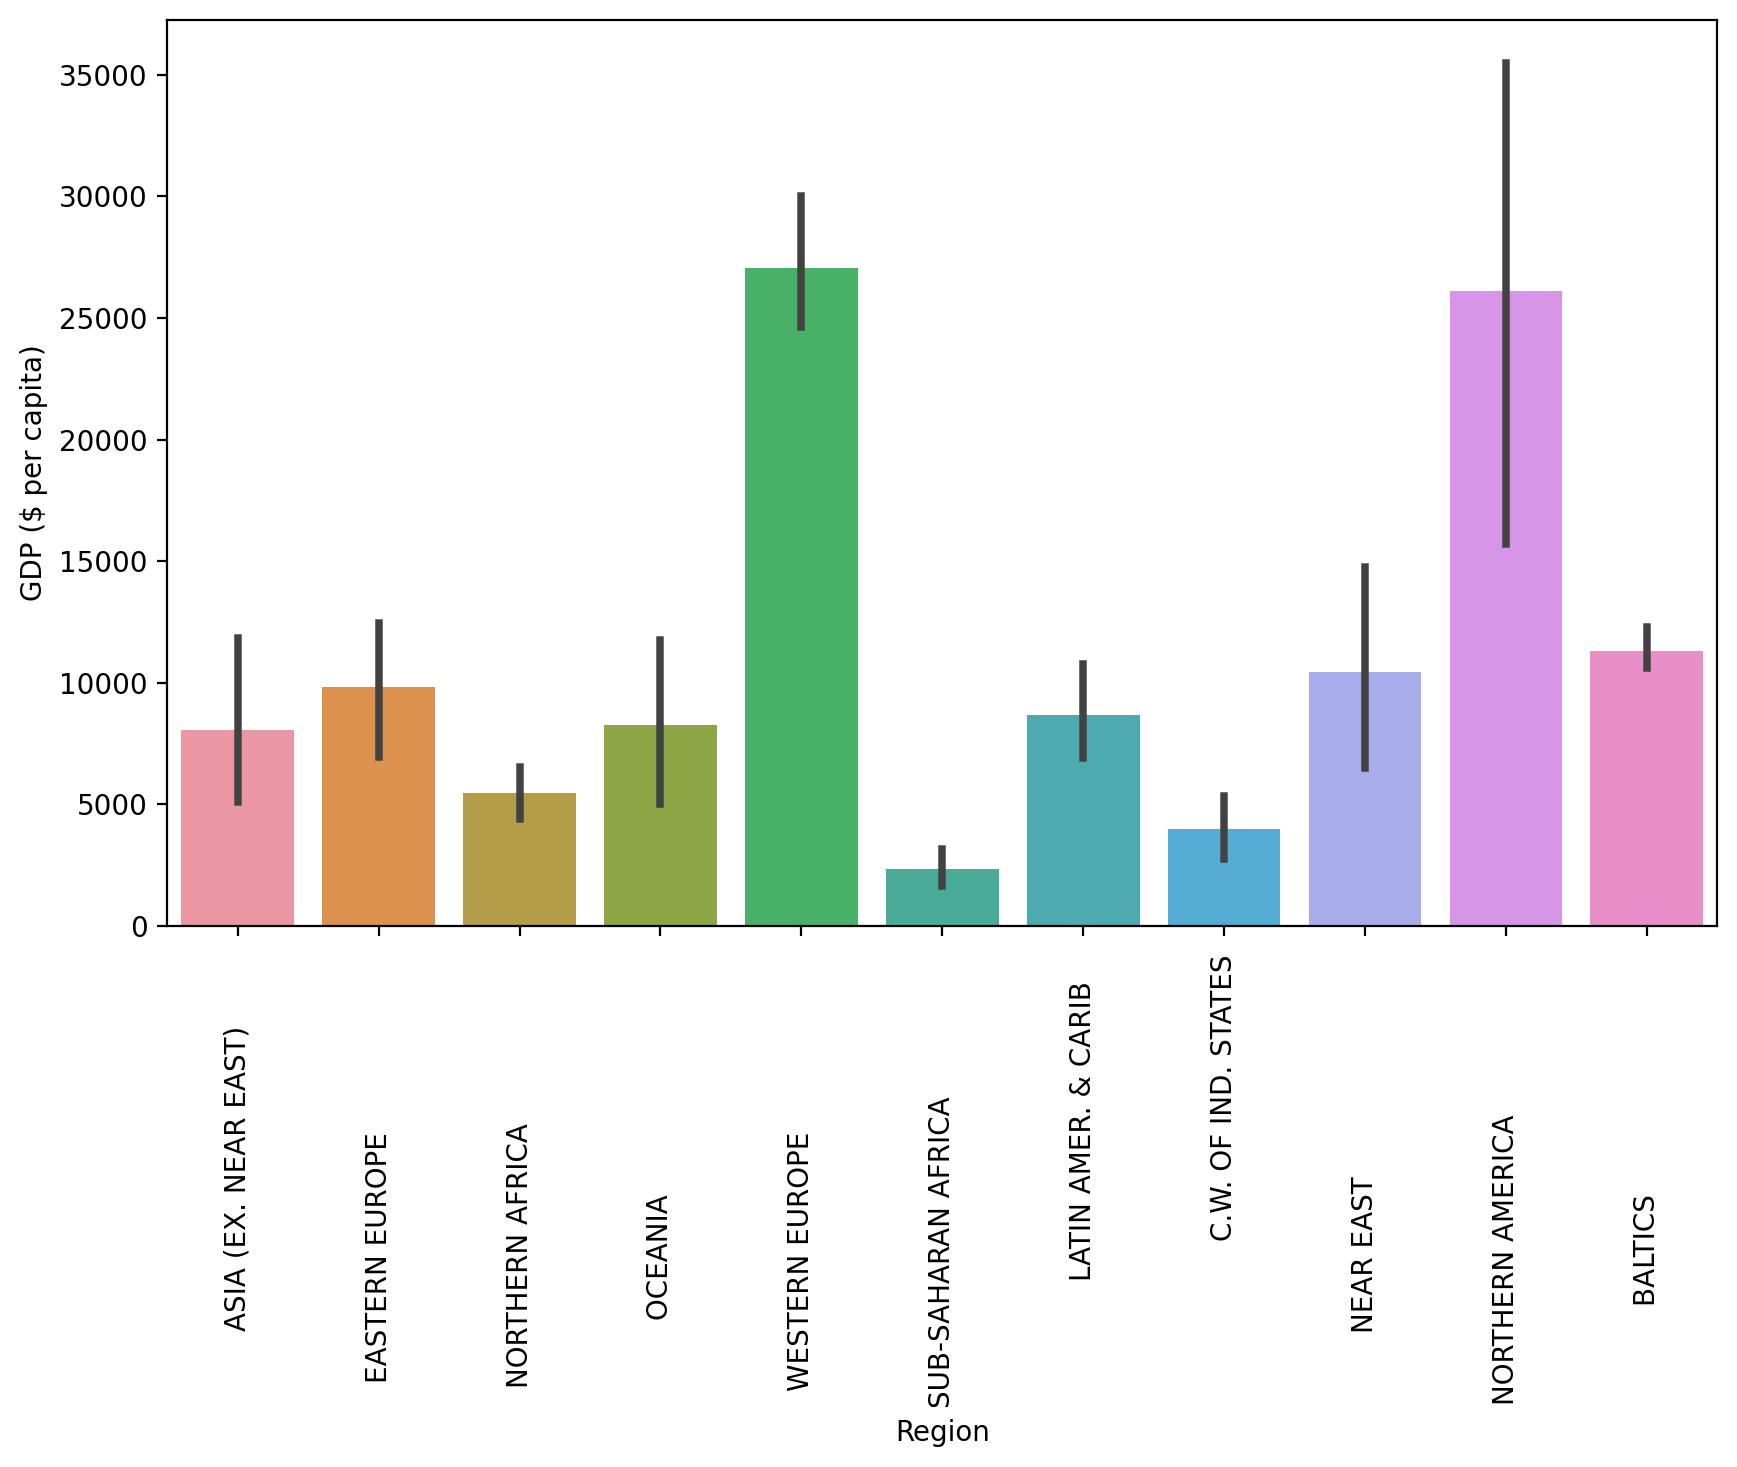

In [11]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=df, y='GDP ($ per capita)', x='Region')
plt.xticks(rotation=90);

The plot above show the Gdp and Standard deviation by region, the 2 of than we can highlight here is __Western Europe__, involve countries in the Euro zone with a well distributed GDP, however the other region os __Northern Amaerica__ with a huge standard deviation, it happens because of US GDP that is a outilier when compare with the others countries in the region.

In [12]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

**Plot a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita**

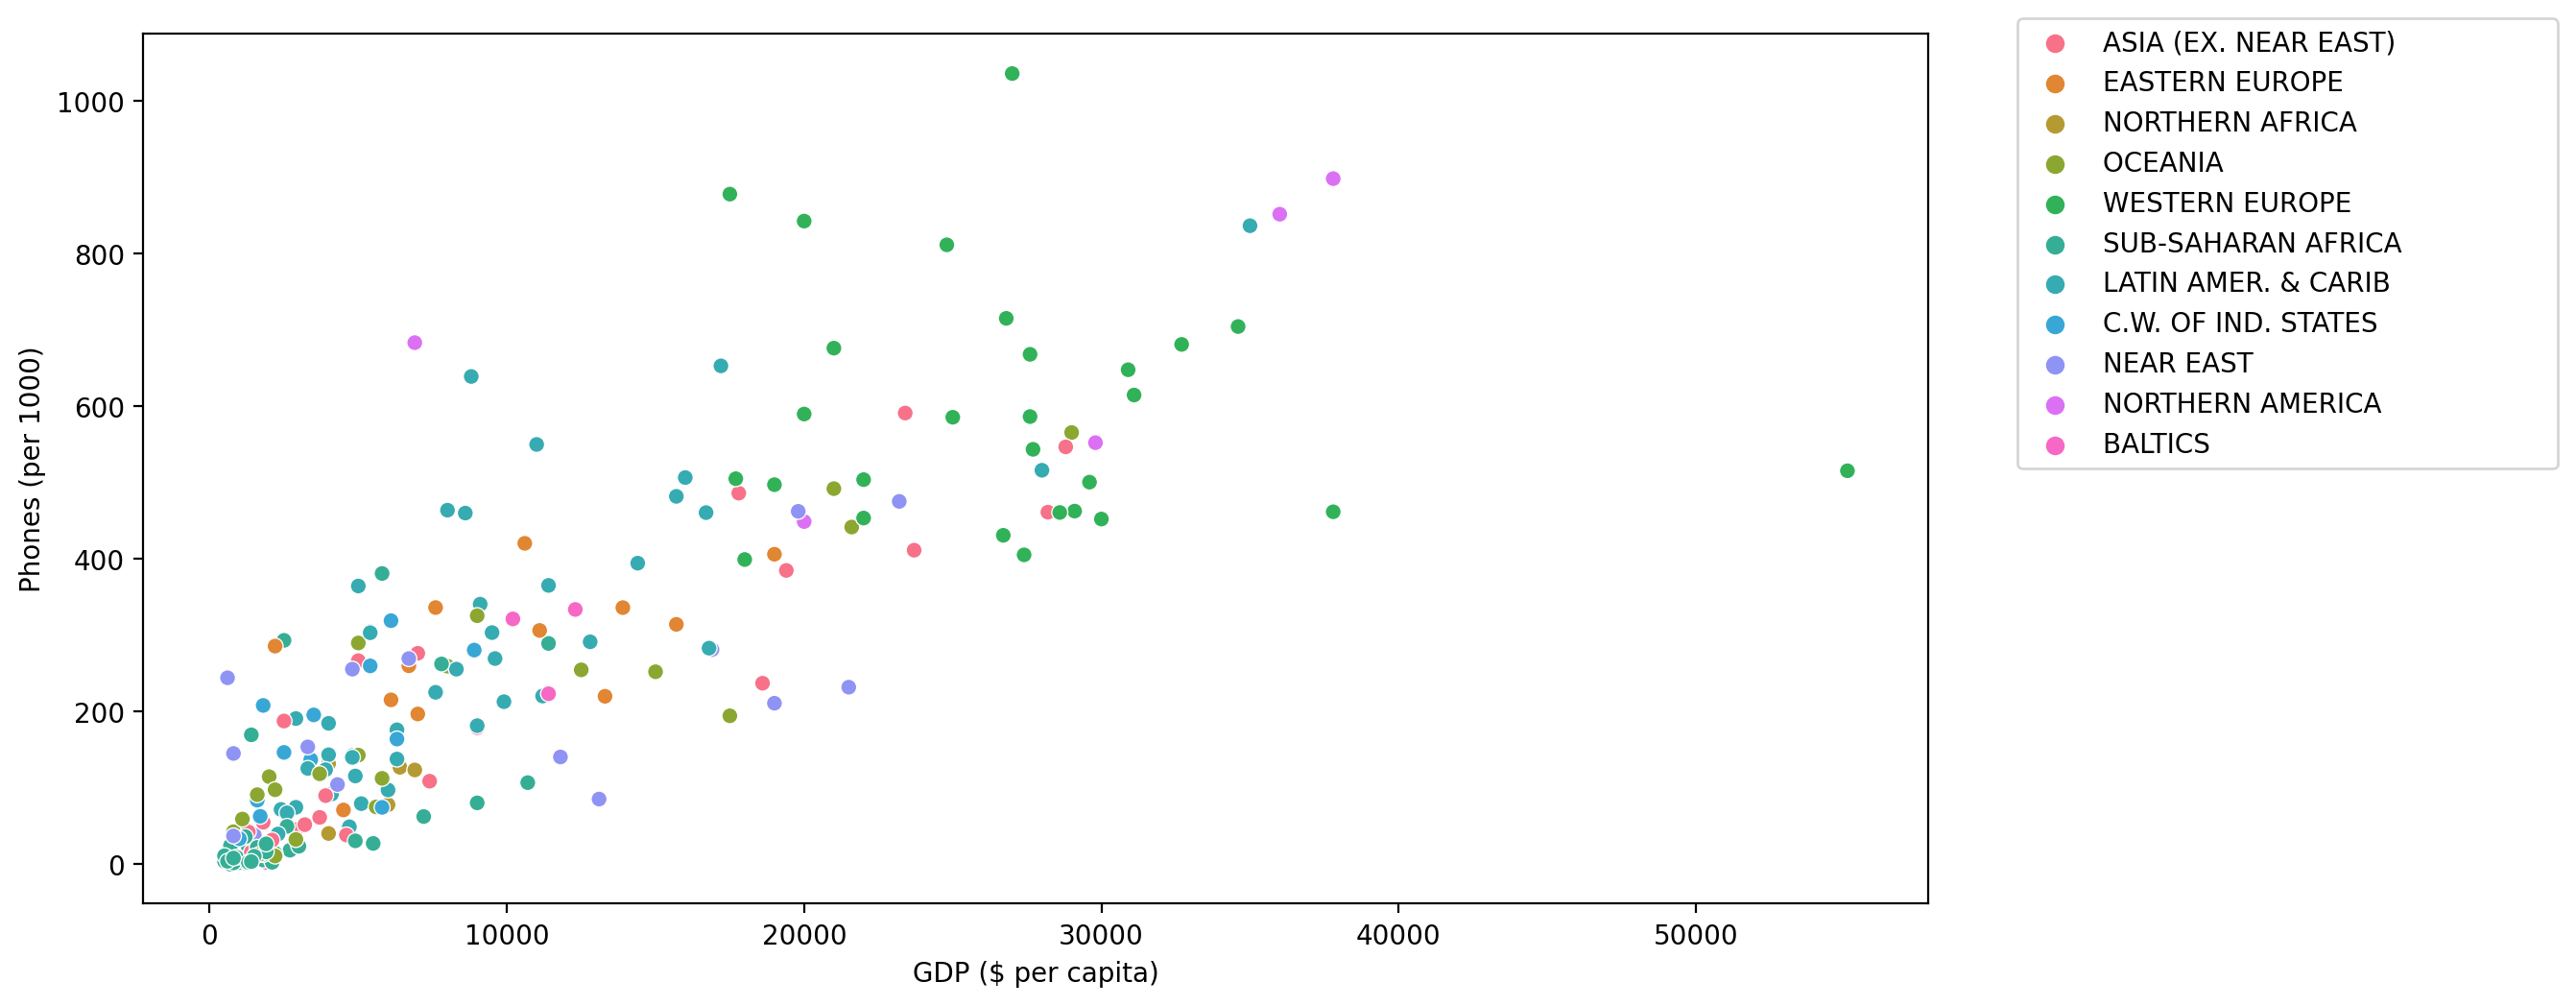

In [13]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df, y='Phones (per 1000)', x='GDP ($ per capita)', hue='Region')
plt.legend(loc=(1.05, 0.5));

In [14]:
#Looking for outiliers, here a contry that has more phones than people per a 1000/people
df[df['Phones (per 1000)']>900]

Country                               Region  Population  Area (sq. mi.)  \
138  Monaco  WESTERN EUROPE                            32543               2   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
138                     16271.5                         205.0           7.75   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
138                                5.43             27000.0          99.0   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
138             1035.6         0.0        0.0      100.0      NaN       9.19   

     Deathrate  Agriculture  Industry  Service  
138      12.91         0.17       NaN      NaN

In [15]:
#The richiest country per capita is Luxembourg
df[df['GDP ($ per capita)']>50000]

Country                               Region  Population  \
121  Luxembourg  WESTERN EUROPE                           474413   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
121            2586                       183.5                           0.0   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
121           8.97                                4.81             55100.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
121         100.0              515.4       23.28        0.4      76.32   

     Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
121      NaN      11.94       8.41         0.01      0.13     0.86

**Now let's explore the relationship between GDP per Capita and Literacy(%)**

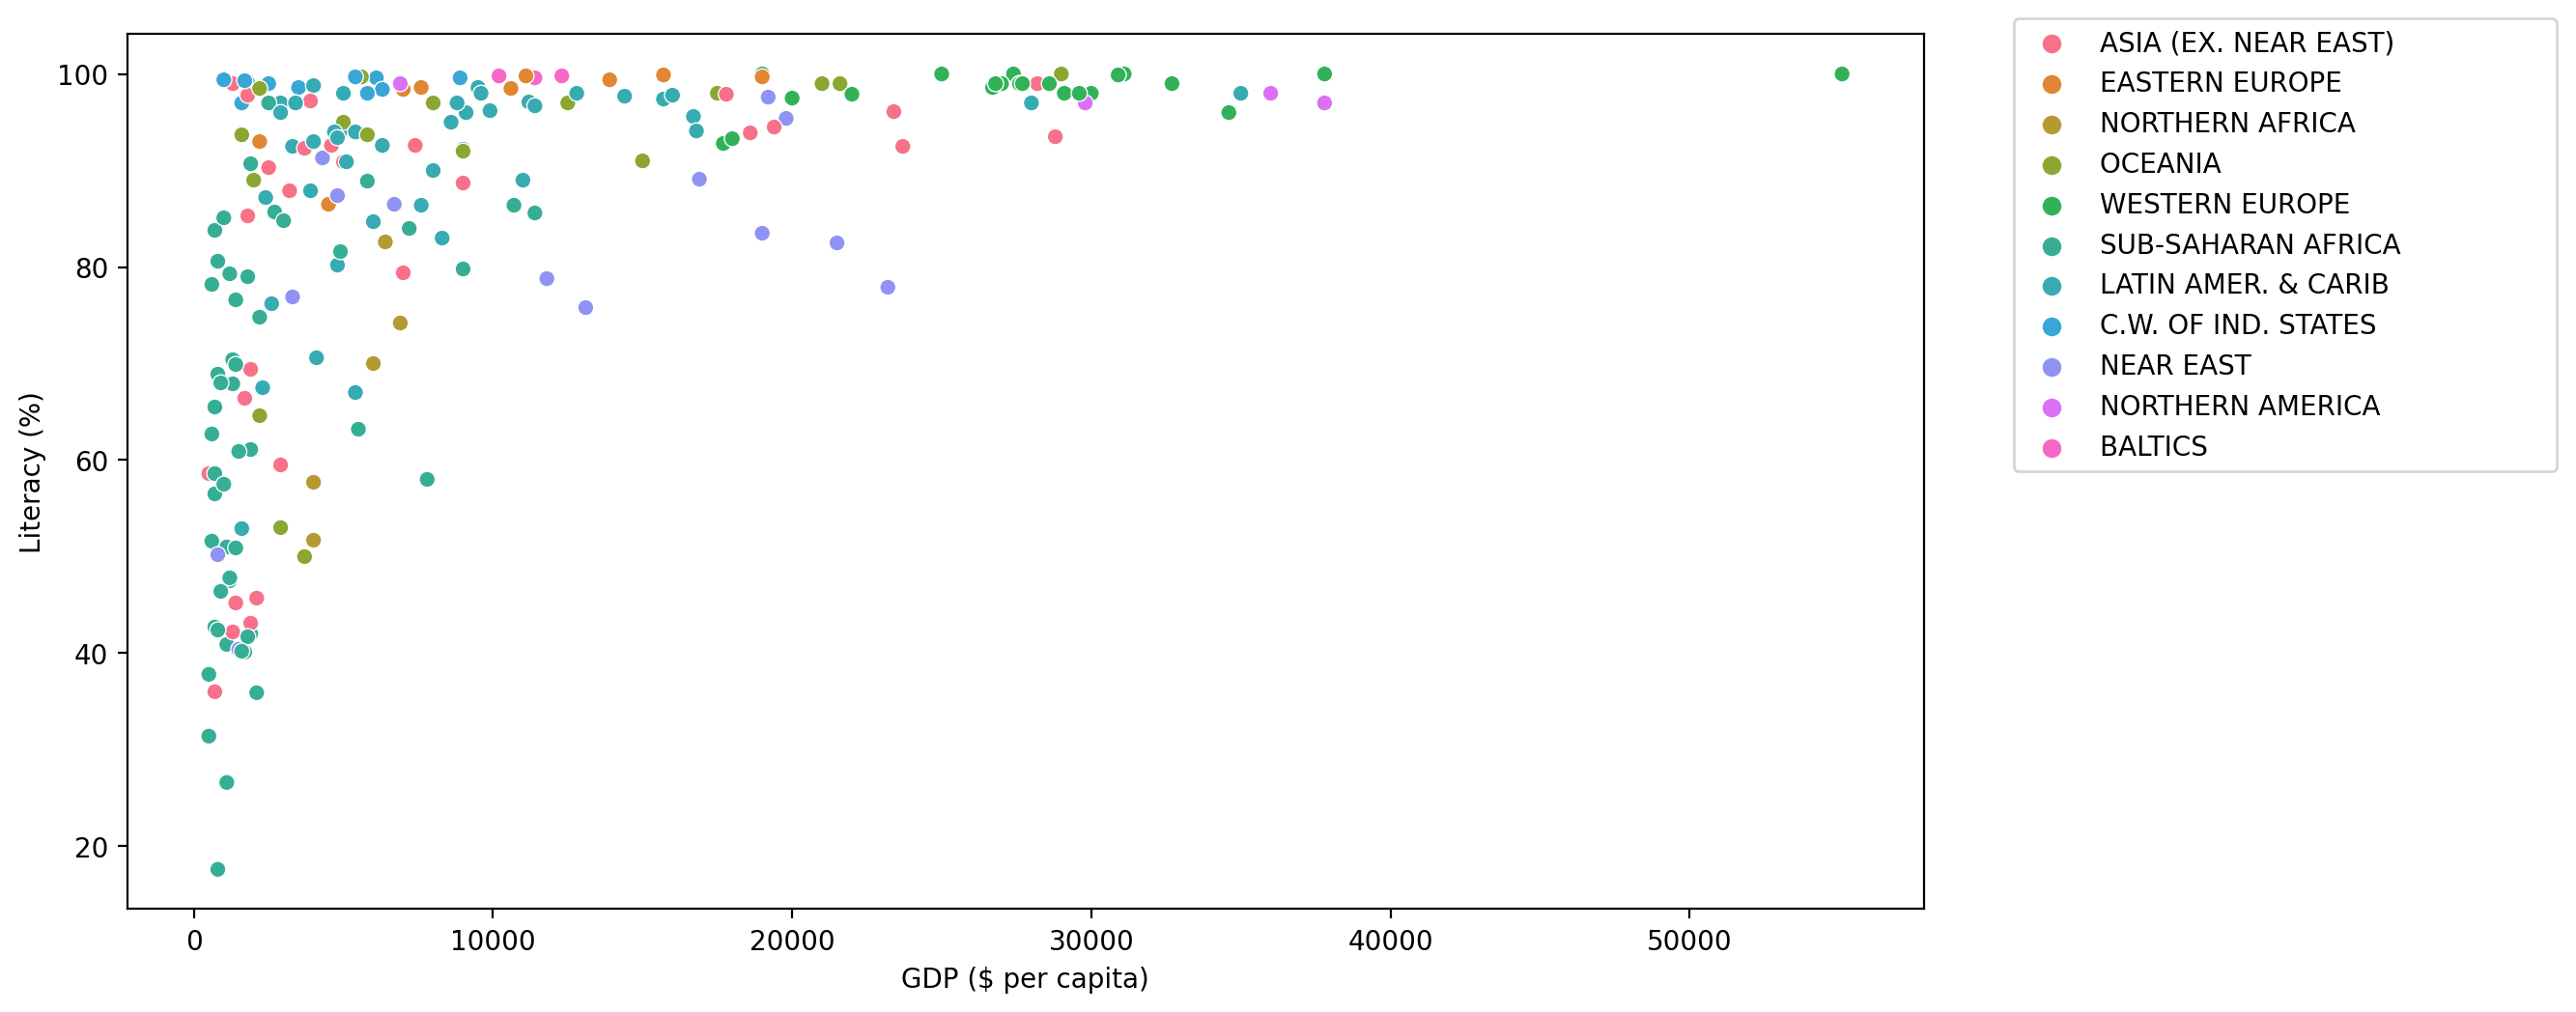

In [16]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.legend(loc=(1.05,0.5));

**Heatmap of the Correlation between columns in the DataFrame.**

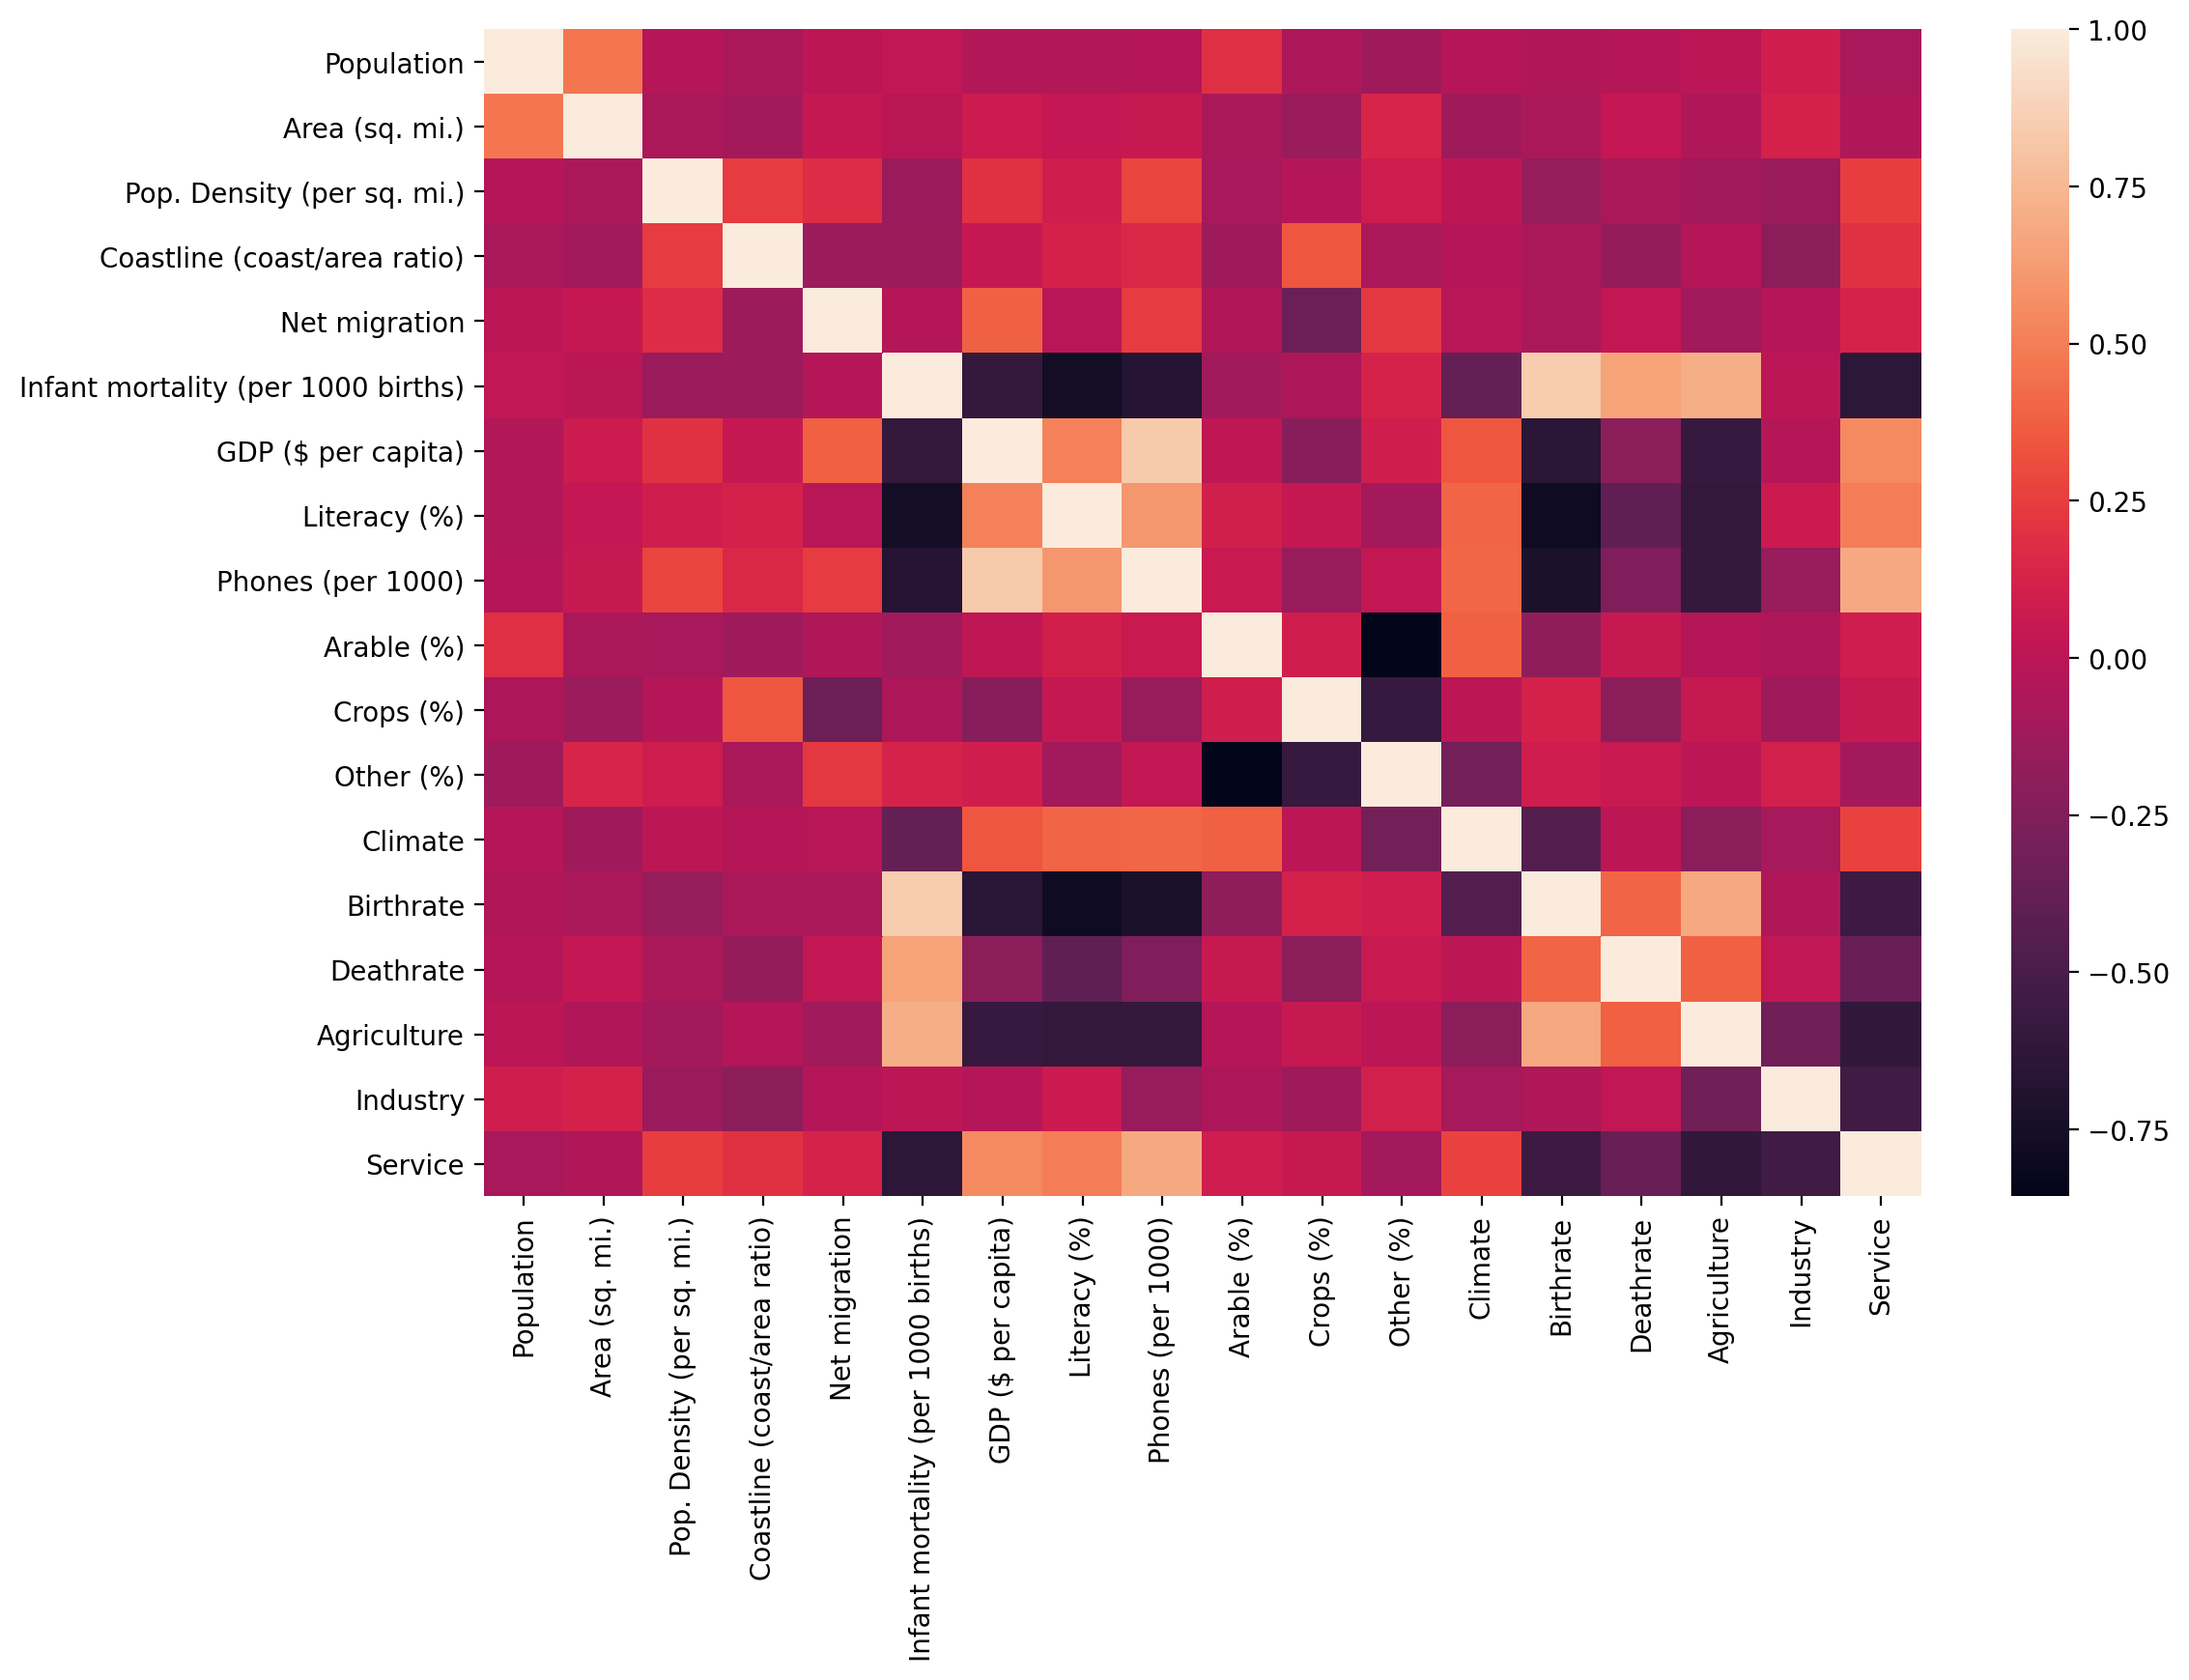

In [17]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr());

Seaborn can auto perform __hierarchal clustering__ through the clustermap() function. Create a clustermap of the correlations between each column with this function.

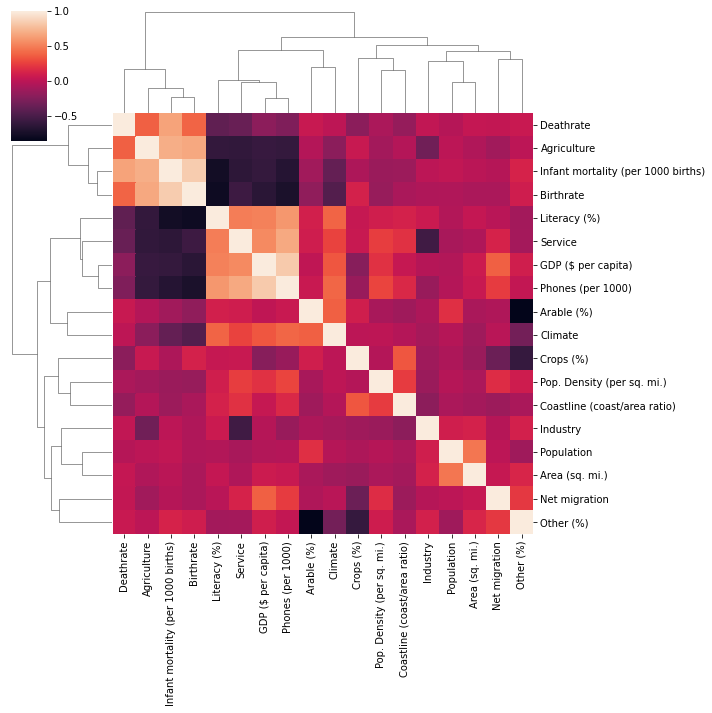

In [18]:
sns.clustermap(df.corr());

-----

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

In [19]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Countries have NaN for Agriculture? What is the main aspect of these countries?**

In [20]:
#Search for the countries with null values. Lets Google and discover their similarities
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Most of these countries are tiny islands, with the exception of Greenland and Western Sahara. We are going to fill any of these countries missing NaN values with 0, since they are so small.**

    df[df['feature'].isnull()]
    

In [21]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)
df['Agriculture'].isnull().sum()

0

In [22]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [23]:
df[df['Climate'].isnull()]['Country']

5             Angola
36            Canada
50           Croatia
66     Faroe Islands
101            Italy
115          Lebanon
118            Libya
120        Lithuania
121       Luxembourg
129            Malta
137          Moldova
138           Monaco
141          Morocco
145            Nepal
169           Russia
181           Serbia
186         Slovenia
200         Tanzania
Name: Country, dtype: object

**Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**


In [24]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

**Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [25]:
#We are going to aplly the same mean strategy for 'Literacy(%)'
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [26]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

__We are going to check all the countries that still have missing data__

In [27]:
df[df['Net migration'].isnull()]['Country']

47    Cook Islands
Name: Country, dtype: object

In [28]:
df[df['Infant mortality (per 1000 births)'].isnull()]['Country']

47    Cook Islands
Name: Country, dtype: object

In [29]:
df[df['Phones (per 1000)'].isnull()]['Country']

52        Cyprus
58    East Timor
Name: Country, dtype: object

In [30]:
df[df['Arable (%)'].isnull()]['Country']

85    Guernsey
Name: Country, dtype: object

In [31]:
df[df['Crops (%)'].isnull()]['Country']

85    Guernsey
Name: Country, dtype: object

In [32]:
df[df['Other (%)'].isnull()]['Country']

85    Guernsey
Name: Country, dtype: object

In [33]:
df[df['Birthrate'].isnull()]['Country']

181    Serbia
Name: Country, dtype: object

In [34]:
df[df['Deathrate'].isnull()]['Country']

47     Cook Islands
181          Serbia
Name: Country, dtype: object

In [35]:
df[df['Industry'].isnull()]['Country']

138    Monaco
Name: Country, dtype: object

In [36]:
df[df['Service'].isnull()]['Country']

138    Monaco
Name: Country, dtype: object

__Taken in consideration many features are missing for the same countries, and all have relevant small population density we decide to drop them__

In [37]:
#Drop the small left
df = df.dropna()

## Data Feature Preparation

**Prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [38]:
X = df.drop('Country', axis=1)

**Use Pandas to create dummy variables for categorical features to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [39]:
X = pd.get_dummies(X)

### Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X = scaler.fit_transform(X)

In [43]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model

**By use a for loop we will create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD.**

In [44]:
from sklearn.cluster import KMeans

In [45]:
ssd = []
for k in range (2, 30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

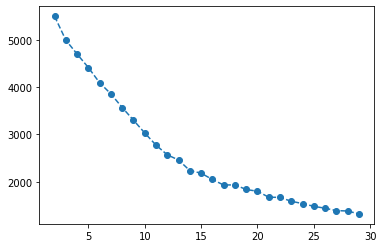

In [46]:
plt.plot(range(2,30), ssd, 'o--');

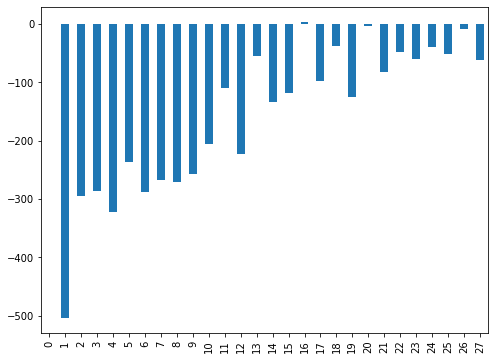

In [47]:
#Call a Series of ssd and calculate the difference and than plot
plt.figure(figsize=(8,6))
pd.Series(ssd).diff().plot(kind='bar');

-----

# Model Interpretation


**As this is unsupervised learning, there is no 100% correct answer here.
So, we are going to try a model with k=3**

In [48]:
model= KMeans(n_clusters=3)

model.fit(scaled_X)

KMeans(n_clusters=3)

In [49]:
model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2])

In [50]:
X['k=3 Cluster Labels']= model.labels_

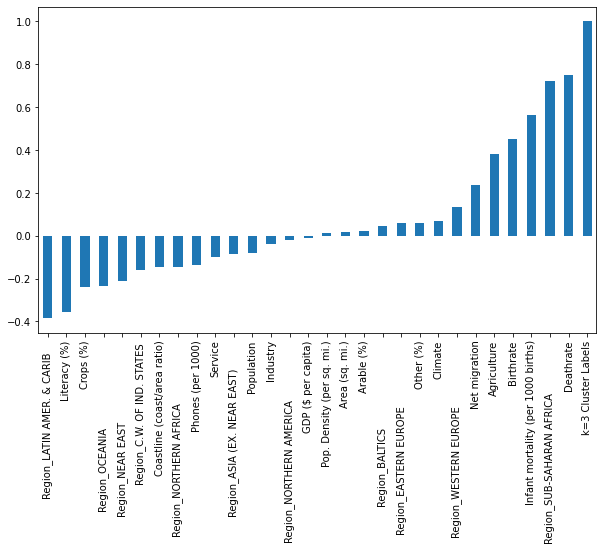

In [51]:
plt.figure(figsize=(10,6))
X.corr()['k=3 Cluster Labels'].sort_values().plot(kind='bar');

------------
-------------

#  Geographical Model Interpretation

The best way to interpret this model is through visualizing the clusters of countries on a map!

**Create cluster labels for a chosen K value. Based on the solutions, we believe either K=3 or K=15 are reasonable choices**


**Plot out these clusters on a country level choropleth map**

 Figure out how to create a geographical choropleth map using plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries


Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with plotly.

In [52]:
iso = pd.read_csv('country_iso_codes.csv')
iso.head()

Country  \
0                                      Afghanistan   
1  Akrotiri and Dhekelia – See United Kingdom, The   
2                                    Åland Islands   
3                                          Albania   
4                                          Algeria   

                                          ISO Code  
0                                              AFG  
1  Akrotiri and Dhekelia – See United Kingdom, The  
2                                              ALA  
3                                              ALB  
4                                              DZA

In [53]:
#Reformate ISO codes to be a dictionary mapping
iso_map = iso.set_index('Country')['ISO Code'].to_dict()

In [54]:
df['ISO Code'] = df['Country'].map(iso_map)

In [55]:
df['Cluster'] = model.labels_

In [56]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0          36.0  ...       0.22      87.65      1.0      46.60      20.34   
1          86.5  ...       4.42      74.49      3.0      15.11       5.22   
2          70.0  ...       0.25      96.53      1.0      17.14       4.61   
3          97.0  ...      15.00      75.00      2.0      22.46       3.27   
4         100.0  ...       0.00      97.78      3.0       8.71       6.25   

   Agriculture  Industry  Service  ISO Code  Cluster  
0        0.380     0.240    0.380       AFG        2  
1        0.232     0.188    0.579       ALB        0  
2        0.101     0.600    0.298       DZA        0  
3        0.000     0.000    0.000       ASM        0  
4        0.000     0.000    0.000       AND        1  

[5 rows x 22 columns]

In [57]:
import plotly.express as px

fig = px.choropleth(df, locations='ISO Code',
                    color='Cluster', # Clusteris a column of gapminder
                    hover_name="Country") # column to add to hover information
                
fig.show()

## Model 2 with 13 clusters

In [58]:
model2= KMeans(n_clusters=13)

model2.fit(scaled_X)

KMeans(n_clusters=13)

In [65]:
#model2.labels_

In [60]:
X['k=13 Cluster Labels']= model2.labels_

In [61]:
df['Cluster'] = model2.labels_

In [62]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0          36.0  ...       0.22      87.65      1.0      46.60      20.34   
1          86.5  ...       4.42      74.49      3.0      15.11       5.22   
2          70.0  ...       0.25      96.53      1.0      17.14       4.61   
3          97.0  ...      15.00      75.00      2.0      22.46       3.27   
4         100.0  ...       0.00      97.78      3.0       8.71       6.25   

   Agriculture  Industry  Service  ISO Code  Cluster  
0        0.380     0.240    0.380       AFG        1  
1        0.232     0.188    0.579       ALB        4  
2        0.101     0.600    0.298       DZA       11  
3        0.000     0.000    0.000       ASM        9  
4        0.000     0.000    0.000       AND        5  

[5 rows x 22 columns]

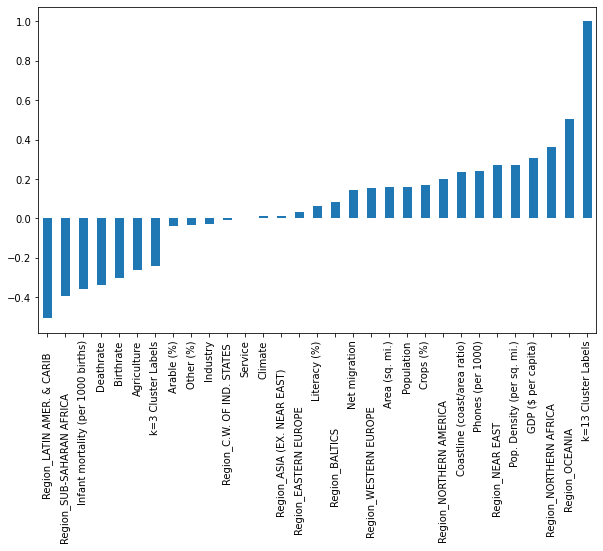

In [63]:
plt.figure(figsize=(10,6))
X.corr()['k=13 Cluster Labels'].sort_values().plot(kind='bar');

In [64]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = df['ISO Code'],
    z = df['Cluster'],
    text = df['Country'],
    colorscale = 'rainbow',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Cluster groups',
))

fig.update_layout(
    title_text='Cluster Groups',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
    )]
)
fig.show()

---